In [1]:
import numpy as np

In [2]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [3]:
y = x > 0
y

array([False,  True,  True])

In [6]:
y = y.astype(np.int64)
y

array([0, 1, 1])

In [7]:
import matplotlib.pylab as plt

In [8]:
def step_function(x):
    return np.array(x > 0, dtype=np.int64)

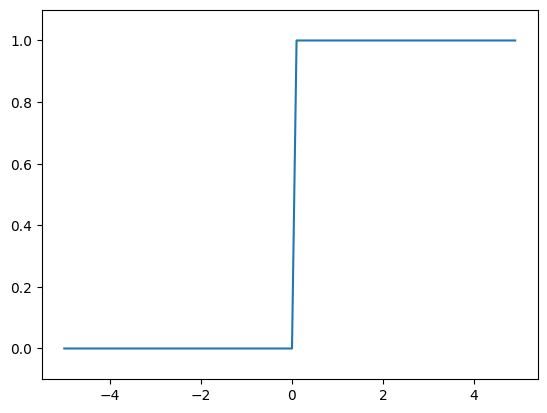

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [13]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [14]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

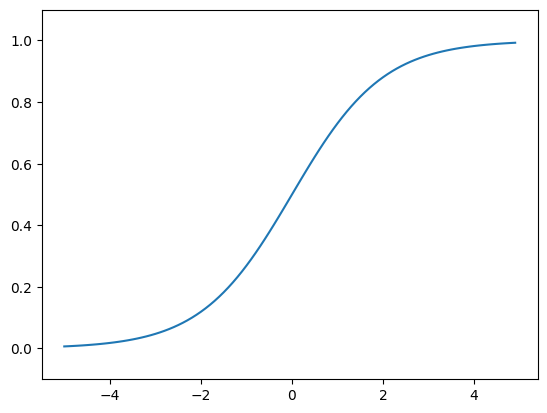

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [16]:
def relu(x):
    return np.maximum(0, x)

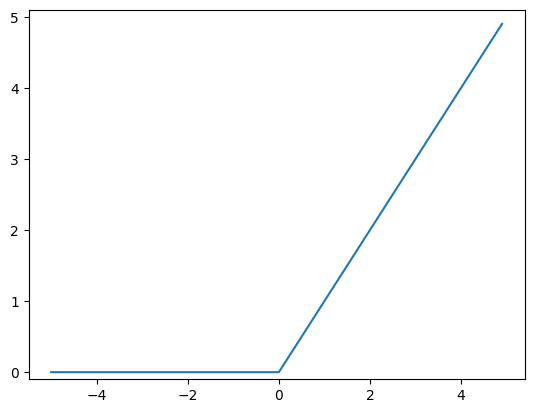

In [19]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.1)
plt.show()

## 3.3 다차원 배열의 계산

In [21]:
A = np.array([1, 2, 3, 4])
print(A)
np.ndim(A)

[1 2 3 4]


1

In [22]:
A.shape

(4,)

In [23]:
A.shape[0]

4

In [24]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [25]:
np.ndim(B)

2

In [26]:
B.shape

(3, 2)

### 행렬의 내적(행렬 곱)

In [27]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [28]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [29]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [39]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.shape

(2, 3)

In [31]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B.shape

(3, 2)

In [32]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [33]:
C = np.array([[1, 2], [3, 4]])
C.shape

(2, 2)

In [34]:
A.shape

(2, 3)

In [41]:
np.dot(C, A)

array([[ 9, 12, 15],
       [19, 26, 33]])

In [36]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([7, 8])

In [37]:
np.dot(A, B)

array([23, 53, 83])

### 신경망의 내적

In [42]:
X = np.array([1, 2])
X.shape

(2,)

In [43]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [44]:
W.shape

(2, 3)

In [45]:
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

## 3층 신경망 구현하기

In [46]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [47]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [51]:
Z1 = sigmoid(A1)

In [54]:
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [55]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [57]:
A2 = np.dot(Z1, W2) + B2
A2

array([0.51615984, 1.21402696])

In [59]:
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [60]:
def identity_function(x):
    return x

In [61]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [62]:
A3 = np.dot(Z2, W3) + B3
A3

array([0.31682708, 0.69627909])

In [63]:
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

### 구현 정리

In [64]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [65]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [66]:
network = init_network()

In [67]:
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

## 출력층 설계하기

In [68]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [69]:
sum_exp_a = np.sum(exp_a)
sum_exp_a

74.1221542101633

In [76]:
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

### 소프트맥스 함수 구현하기

In [72]:
def softmax1(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [73]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/var/folders/f7/zg2l2g451130gxsb17gc7_lw0000gn/T/ipykernel_61565/518197229.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
/var/folders/f7/zg2l2g451130gxsb17gc7_lw0000gn/T/ipykernel_61565/518197229.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [74]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [75]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### 소프트맥스 함수 오버플로 대책

- 입력 신호 중 최댓값을 이용하여 계산하면 안전하다.
- 즉, 저 C의 자리에는 사실 어떤 값이 와도 상관은 없다.

In [82]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수의 특징

In [83]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

In [84]:
print(y)

[0.01821127 0.24519181 0.73659691]


In [85]:
np.sum(y)

1.0

### 손글씨 숫자 인식

In [119]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image

In [120]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()


In [121]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [122]:
img = x_train[0]
label = x_train[0]
print(label)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [117]:
print(img.shape)

(784,)


In [96]:
img = img.reshape(28, 28)

In [97]:
print(img.shape)

(28, 28)


In [98]:
img_show(img)

### 신경망의 추론 처리

In [99]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [164]:
import pickle

print(os.getcwd())
print(os.path.exists('sample_weight.pkl'))

file_path = 'sample_weight.pkl'
print("파일 존재 여부:", os.path.exists(file_path))

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

/Users/basilry/Projects/006_google_ml_bootcamp/oreilly
False
파일 존재 여부: False


In [161]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [158]:
x, t = get_data()
network = init_network()

FileNotFoundError: [Errno 2] No such file or directory: 'sample_weight.pkl'